Data Preparation

In [11]:
import os
import pandas as pd

# Define the path to the directory containing the monthly CSV files
path = 'D:\! Year 2 Class Stuff\Semester 4\Smart Data\Coursework 1 60%\Sales Files'

# Initialize an empty list to store the dataframes
monthly_data = []

# Loop through each file in the directory and append the dataframes to the list
for filename in os.listdir(path):
    if filename.endswith('.csv'):
        df = pd.read_csv(os.path.join(path, filename))
        monthly_data.append(df)

# Concatenate the dataframes into one large dataframe
all_data = pd.concat(monthly_data, ignore_index=True)

# Write the merged data to a new CSV file
all_data.to_csv('all_data.csv', index=False)

# Read in the updated dataframe from the CSV file
df = pd.read_csv('all_data.csv')
df.head(10)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561.0,Wired Headphones,1.0,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"
6,176562.0,USB-C Charging Cable,1.0,11.95,4/29/2019 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563.0,Bose SoundSport Headphones,1.0,99.99,4/2/2019 7:46,"668 Center St, Seattle, WA 98101"
8,176564.0,USB-C Charging Cable,1.0,11.95,4/12/2019 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565.0,Macbook Pro Laptop,1.0,1700.00,4/24/2019 10:38,"915 Willow St, San Francisco, CA 94016"


In [12]:
# Remove NaN missing values
df.dropna(inplace=True)

# Print the updated dataframe

df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
2,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561.0,Wired Headphones,1.0,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"
6,176562.0,USB-C Charging Cable,1.0,11.95,4/29/2019 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563.0,Bose SoundSport Headphones,1.0,99.99,4/2/2019 7:46,"668 Center St, Seattle, WA 98101"
8,176564.0,USB-C Charging Cable,1.0,11.95,4/12/2019 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565.0,Macbook Pro Laptop,1.0,1700.00,4/24/2019 10:38,"915 Willow St, San Francisco, CA 94016"
10,176566.0,Wired Headphones,1.0,11.99,4/8/2019 14:05,"83 7th St, Boston, MA 02215"


In [13]:
# Convert 'Quantity Ordered' and 'Price Each' to numeric

df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

# Print the updated dataframe

df[['Quantity Ordered', 'Price Each']].dtypes

Quantity Ordered    float64
Price Each          float64
dtype: object

In [14]:
# Extract the month from the Order Date column and create a new column named Month
df['Month'] = pd.to_datetime(df['Order Date']).dt.month.astype(int)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4
2,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561.0,Wired Headphones,1.0,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4


In [15]:
# Extract city name from Purchase Address column
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1].strip())
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,Dallas
2,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston
3,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
4,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
5,176561.0,Wired Headphones,1.0,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles


Data Analysis

In [16]:
sum_var = df['Price Each'].sum()
mean_var = df['Price Each'].mean()
std_var = df['Price Each'].std()
skew_var = df['Price Each'].skew()
kurt_var = df['Price Each'].kurtosis()


print('Sum:', sum_var)
print('Mean:', mean_var)
print('Standard Deviation:', std_var)
print('Skewness:', skew_var)
print('Kurtosis:', kurt_var)

Sum: 34289130.67999999
Mean: 184.3997347670135
Standard Deviation: 332.7313298840936
Skewness: 2.8721487292935257
Kurtosis: 9.094568341148197


In [17]:
# Calculate the correlation matrix
corr_matrix = df.corr()
corr_matrix

,Order ID,Quantity Ordered,Price Each,Month
Order ID,1.000000,0.000702,-0.002857,0.993063
Quantity Ordered,0.000702,1.000000,-0.148272,0.000791
Price Each,-0.002857,-0.148272,1.000000,-0.003375
Month,0.993063,0.000791,-0.003375,1.000000


Data Exploration

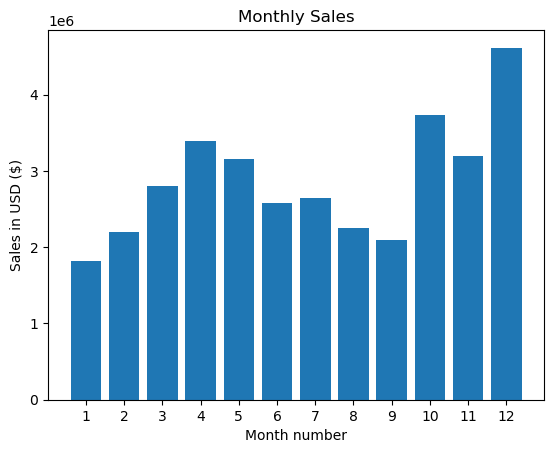

The best sales month was 12 with a total sales of $4613443.34


In [18]:
import matplotlib.pyplot as plt

df['Sales'] = df['Quantity Ordered'] * df['Price Each']
monthly_sales = df.groupby('Month')['Sales'].sum()

# find the month with the highest sales and its corresponding sales value

best_month = monthly_sales.idxmax()
best_month_sales = monthly_sales.max()

# plot the monthly sales data on a bar graph
months = range(1, 13)
plt.bar(months, monthly_sales)
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.title('Monthly Sales')
plt.show()

print(f'The best sales month was {best_month} with a total sales of ${best_month_sales}')

In [19]:
# Group the data by city and sum the Quantity Ordered column
city_sales = df.groupby('City')['Quantity Ordered'].sum()

# Sort the values in descending order and select the city with the highest sum
highest_sales_city = city_sales.sort_values(ascending=False)

print(f'The city with the highest product sales is: {highest_sales_city.index[0]}')

The city with the highest product sales is: San Francisco


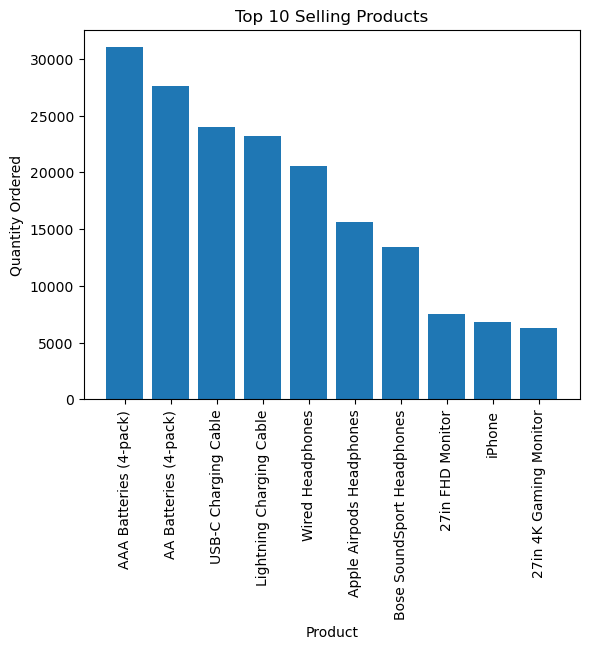

The product that was sold the most overall is AAA Batteries (4-pack)


In [20]:
# Group products by name and sum the Quantity Ordered column
product_group = df.groupby('Product')['Quantity Ordered'].sum().reset_index()

# Sort the products by their total quantity sold
product_group = product_group.sort_values('Quantity Ordered', ascending=False)

# Create a bar graph to visualize the top 10 selling products
top_products = product_group.head(10)
plt.bar(top_products['Product'], top_products['Quantity Ordered'])
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Top 10 Selling Products')
plt.show()

# Print the product that was sold the most overall
most_sold_product = product_group.iloc[0]['Product']

print(f'The product that was sold the most overall is {most_sold_product}')

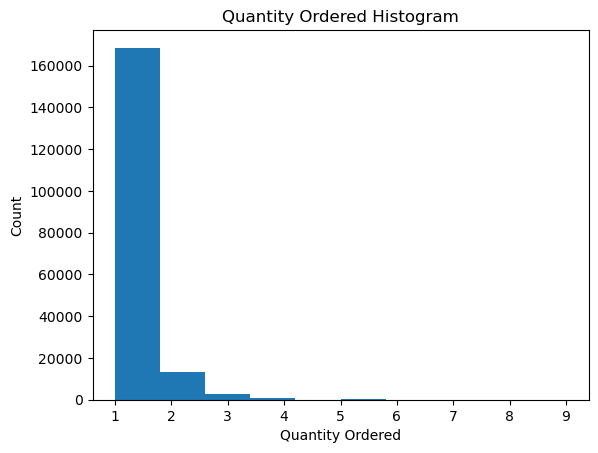

In [21]:
# Create a histogram plot of Quantity Ordered

plt.hist(df['Quantity Ordered'], bins=10)

# Set the title and axis labels
plt.title('Quantity Ordered Histogram')
plt.xlabel('Quantity Ordered')
plt.ylabel('Count')


plt.show()